In [ ]:
# We'll start by importing some libraries
import numpy as np # Very helpful (and popular!) for mathematical computation
import torch # The main deep learning library we'll use (there are others...)
import torch.nn as nn
import torchvision # Specialized for vision tasks such as recognizing digits
import matplotlib.pyplot as plt # Helpful for plotting things (like our images!)

In [ ]:
trainingdata = torchvision . datasets. FashionMNIST ("./FashionMNIST/",train=True ,download=True , transform = torchvision . transforms . ToTensor ())
testdata = torchvision .datasets. FashionMNIST ("./FashionMNIST/",train=False ,download=True , transform = torchvision . transforms . ToTensor ())

100%|██████████| 26421880/26421880 [00:01<00:00, 15884509.94it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 277112.19it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4997196.66it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9630810.43it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
print(f'There are {len(trainingdata)} training images.')
print(f'There are {len(testdata)} test images.')

There are 60000 training images.
There are 10000 test images.


In [ ]:
image, label = trainingdata[0]
print(image.shape) # A 1x28x28 image. This means one color and on a grid of 28x28 pixels.
print(label) # A single number corresponding to the label of this image.

torch.Size([1, 28, 28])
9


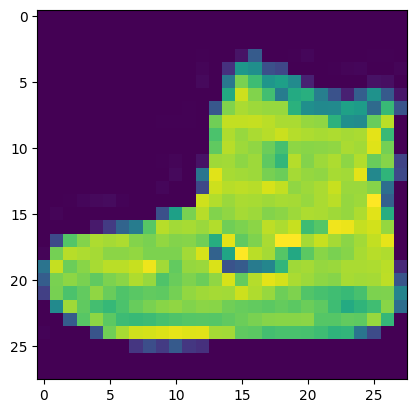

In [ ]:
plt.imshow(image.squeeze()) # Plot the 28x28 image
plt.show()

In [ ]:
# The DataLoader is a nifty class for wrapping the data so we can load batches easily
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

images, labels = next(iter(trainDataLoader)) # Let's take a look at an example batch
print(images.shape) # There are 64 images
print(labels.shape) # And the corresponding 64 labels

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
#Define network variables

input_size = 28*28
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
output_size = 10


In [ ]:
# We write this in the standard python class format
class Model(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    super(Model, self).__init__()
    # Define the first hidden layer
    self.layer1 = nn.Linear(input_size, hidden_size1)
    self.relu1 = nn.ReLU()

    # Define the second hidden layer
    self.layer2 = nn.Linear(hidden_size1, hidden_size2)
    self.relu2 = nn.ReLU()

    # Define the third hidden layer
    self.layer3 = nn.Linear(hidden_size2, hidden_size3)
    self.relu3 = nn.ReLU()

    # Define the output layer
    self.output_layer = nn.Linear(hidden_size3, output_size)

  def forward(self, x):
    x = x.view(-1, 28*28) # Change from 28x28 view to 784 vector
    # Forward pass through the network
    x = self.layer1(x)
    x = self.relu1(x)

    x = self.layer2(x)
    x = self.relu2(x)

    x = self.layer3(x)
    x = self.relu3(x)

    x = self.output_layer(x)

    return x

# Step 1: Model
model = Model(input_size, hidden_size1, hidden_size2, hidden_size3, output_size) # Use the class we just defined
# Step 2: Loss
loss = torch.nn.CrossEntropyLoss()
# Step 3: Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Use stochastic gradient descent on the weights

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'We\'re using the {device}.')
# Put the model on the device
model = model.to(device)

We're using the cpu.


In [ ]:
train_losses = []
test_losses = []
Epoch = 10

for epoch in range(Epoch): # We'll train for 5 "epochs"
  train_loss = 0
  test_loss = 0

  # Evaluation process
  for i, data in enumerate(testDataLoader):
    images, labels = data # Unpack the data into the images and labels
    images, labels = images.to(device), labels.to(device) # Put on device
    predicted_output = model(images) # Apply our network to the images
    fit = loss(predicted_output, labels) # Measure how well the predicted output matches the labels
    test_loss += fit.item() # Add the fit to the loss for tracking purposes

  # Training process
  for i, data in enumerate(trainDataLoader):
    images, labels = data # Unpack the data into the images and labels
    images, labels = images.to(device), labels.to(device) # Put on device
    optimizer.zero_grad() # Zero out the gradient values
    predicted_output = model(images) # Apply our network to the images
    fit = loss(predicted_output, labels) # Measure how well the predicted output matches the labels
    fit.backward() # Compute the gradient of the fit with respect to the model parameters
    optimizer.step() # Update the weights in the model using gradient descent
    train_loss += fit.item() # Add the fit to the loss for tracking purposes

  # Add the current losses to our tracking lists
  train_losses += [train_loss/len(trainDataLoader)]
  test_losses += [test_loss/len(testDataLoader)]

  # Print the current loss
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')



Epoch 0, Train loss 1671.2861694693565, Test loss 361.7616295814514
Epoch 1, Train loss 830.2785234451294, Test loss 170.60651499032974
Epoch 2, Train loss 663.4133141934872, Test loss 123.64156544208527
Epoch 3, Train loss 579.427224189043, Test loss 107.18378725647926
Epoch 4, Train loss 528.7913171052933, Test loss 94.07629960775375
Epoch 5, Train loss 493.9728664457798, Test loss 90.59581160545349
Epoch 6, Train loss 466.757394567132, Test loss 84.28528353571892
Epoch 7, Train loss 447.70070995390415, Test loss 85.90157154202461
Epoch 8, Train loss 431.0974342226982, Test loss 77.91709996759892
Epoch 9, Train loss 418.75459088385105, Test loss 80.61609056591988


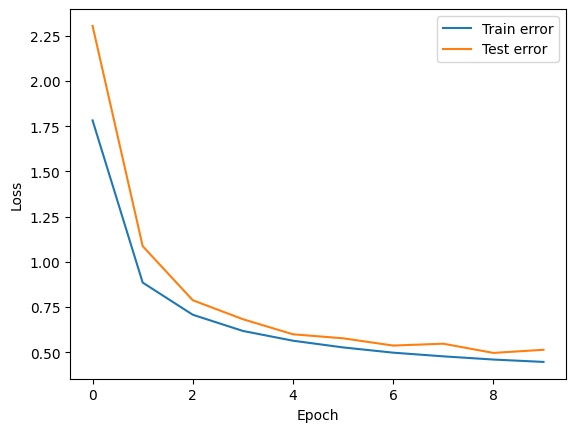

In [ ]:
plt.plot(range(Epoch),train_losses, label='Train error')
plt.plot(range(Epoch),test_losses, label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = torch.max(predicted_output, 1)[1]
print('Predicted:', predicted_classes)
print('Labels:', labels)

Predicted: tensor([1, 6, 3, 4, 5, 9, 4, 1, 0, 3, 5, 6, 7, 6, 7, 7, 5, 6, 8, 3, 9, 5, 1, 7,
        4, 8, 0, 9, 3, 8, 4, 3])
Labels: tensor([1, 4, 1, 2, 7, 9, 2, 1, 0, 3, 5, 6, 7, 6, 7, 7, 5, 6, 8, 3, 9, 5, 1, 7,
        2, 4, 0, 5, 8, 8, 2, 3])


In [ ]:
items = {
    0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankle boot"
}

Predicted: Shirt
Labels: Coat


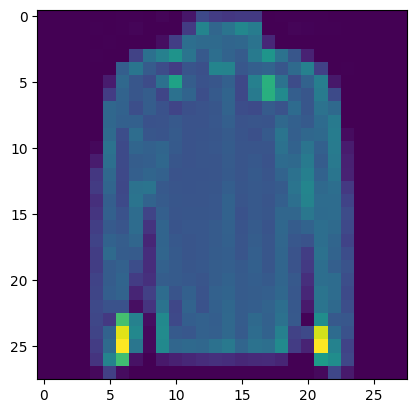

In [ ]:
i = 1
print('Predicted:', items[predicted_classes[i].item()])
print('Labels:', items[labels[i].item()])
plt.imshow(images[i].squeeze().cpu()) # Visualize iamge
plt.show()

Predicted: Sandal
Labels: Sandal


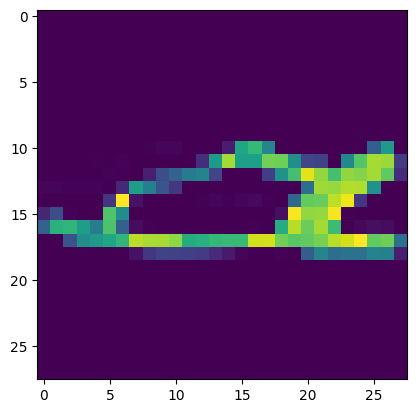

In [ ]:
i = 10
print('Predicted:', items[predicted_classes[i].item()])
print('Labels:', items[labels[i].item()])
plt.imshow(images[i].squeeze().cpu()) # Visualize iamge
plt.show()

Predicted: Dress
Labels: Dress


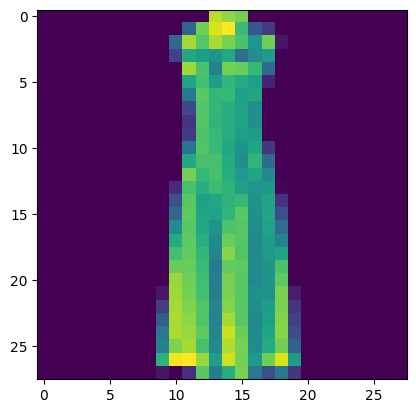

In [ ]:
i = 9
print('Predicted:', items[predicted_classes[i].item()])
print('Labels:', items[labels[i].item()])
plt.imshow(images[i].squeeze().cpu()) # Visualize iamge
plt.show()